In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import d
import u

# Data Fetching

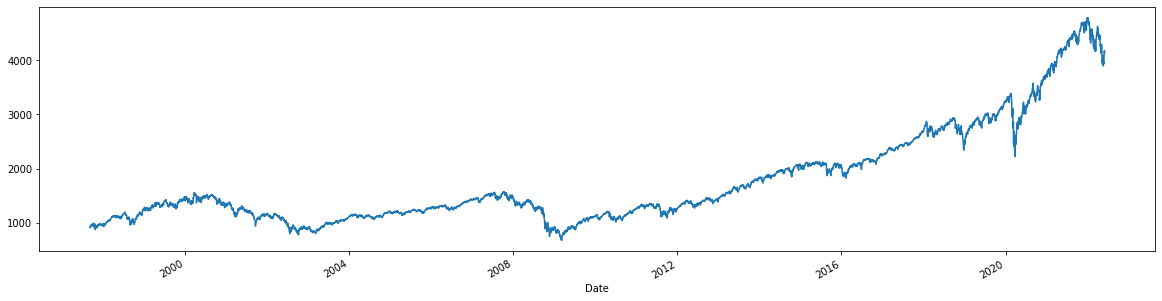

<AxesSubplot:xlabel='Date'>

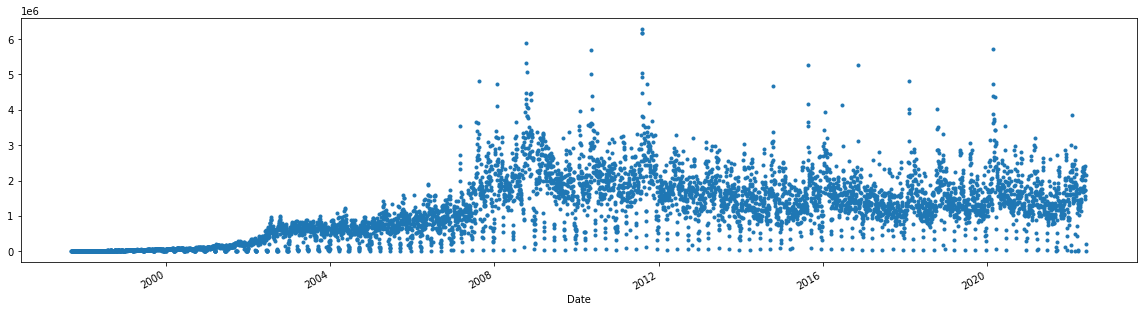

In [3]:
plt.rcParams["figure.figsize"] = (20, 5)

data = d.fetch("data/future/daily", "ES.csv")
data = u.add_dir_data(data)

data["Close"].plot.line()
plt.show()
data["Volume"].plot(style=".")

# Tick Imbalance Bars

In [4]:
tick_imbalance_bars = bars.create_tick_imbalance_bars(
    data, expected_length=100, expected_abs_inbalance=0.3
)
tick_imbalance_bars.head()

,Volume,Open,Close,High,Low
Date,,,,,
1997-09-10,153420.0,915.25,975.50,975.5,908.50
1997-10-06,9250.0,981.50,981.50,981.5,981.50
1997-10-07,44020.0,989.50,925.05,989.5,925.05
1997-10-13,15830.0,976.25,977.50,977.5,976.25
1997-10-15,97410.0,931.50,944.00,979.5,931.50


c:\users\maxga\appdata\local\programs\python\python38\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


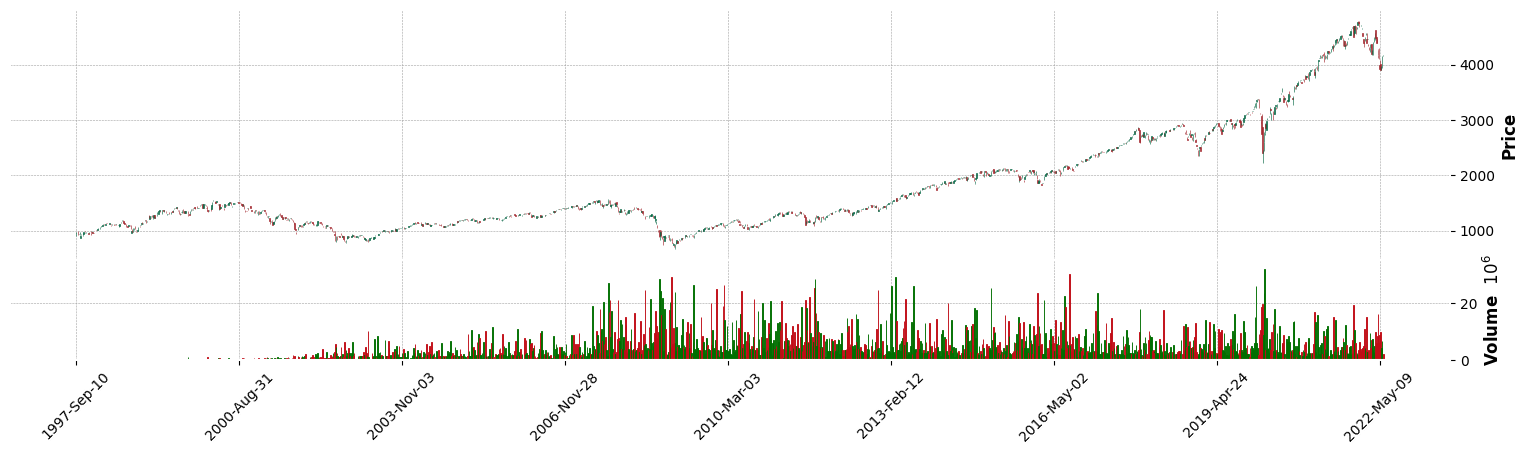

In [5]:
mplf.plot(
    tick_imbalance_bars, type="candle", style="charles", figsize=(20, 5), volume=True
)

# Volume Imbalance Bars (TODO: Investigate)

In [6]:
data["dv"] = data["Close"] * data["Volume"]

In [7]:
mean_weekly_volume = np.mean(data.resample("W-MON")["Volume"].sum())
volume_imbalance_bars = bars.create_volume_imbalance_bars(
    data,
    expected_length=10,
    min_observation_weight=0.01,
    expected_abs_inbalance=mean_weekly_volume / 5,
    # max_length=100,
)
volume_imbalance_bars.head(8)

,Volume,Open,Close,High,Low,dv
Date,,,,,,
1997-09-10,105308160.0,915.25,919.00,1555.50,874.00,1.257050e+11
2002-07-11,791120.0,927.00,927.00,927.00,927.00,7.333682e+08
2002-07-12,162047800.0,917.25,1001.25,1010.75,777.75,1.465352e+11
2003-08-29,28192240.0,1007.75,1058.50,1058.50,994.00,2.901551e+10
2003-11-07,33577220.0,1050.50,1155.25,1155.25,1032.00,3.688498e+10
2004-02-12,4675150.0,1151.00,1138.50,1156.50,1138.50,5.357626e+09
2004-02-25,50736250.0,1143.00,1144.00,1157.75,1083.50,5.682569e+10
2004-06-24,10554600.0,1141.25,1098.75,1141.25,1098.75,1.180968e+10


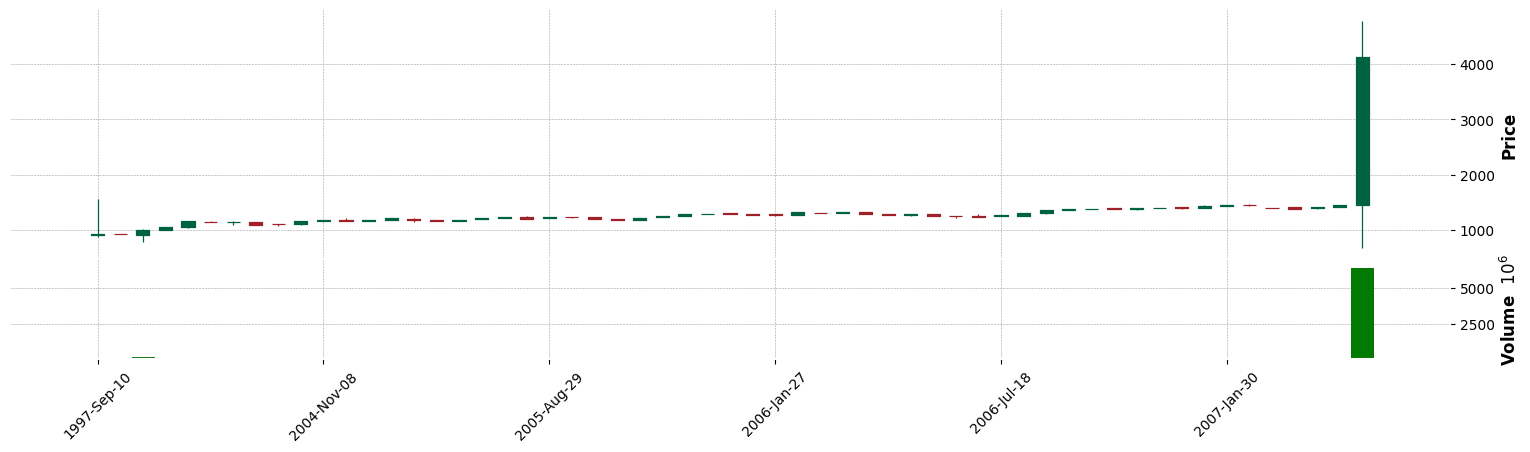

In [8]:
mplf.plot(
    volume_imbalance_bars, type="candle", style="charles", figsize=(20, 5), volume=True
)

# Dollar Imbalance Bars (TODO: Investigate)

In [9]:
mean_weekly_dv = np.mean(data.resample("W-MON")["dv"].sum())
dv_imbalance_bars = bars.create_dollar_volume_imbalance_bars(
    data,
    expected_length=10,
    min_observation_weight=0.01,
    expected_abs_inbalance=mean_weekly_dv / 5,
    # max_length=100,
)
dv_imbalance_bars.head()

,Volume,Open,Close,High,Low,dv
Date,,,,,,
1997-09-10,267393940.0,915.25,995.50,1555.50,777.75,2.722212e+11
2003-08-27,318610.0,995.75,995.75,995.75,995.75,3.172559e+08
2003-08-28,19578630.0,1001.25,1049.25,1049.25,994.00,2.001120e+10
2003-10-17,18368640.0,1037.75,1069.00,1069.00,1028.50,1.920420e+10
2003-12-02,9064380.0,1067.00,1129.50,1129.50,1060.50,9.875417e+09


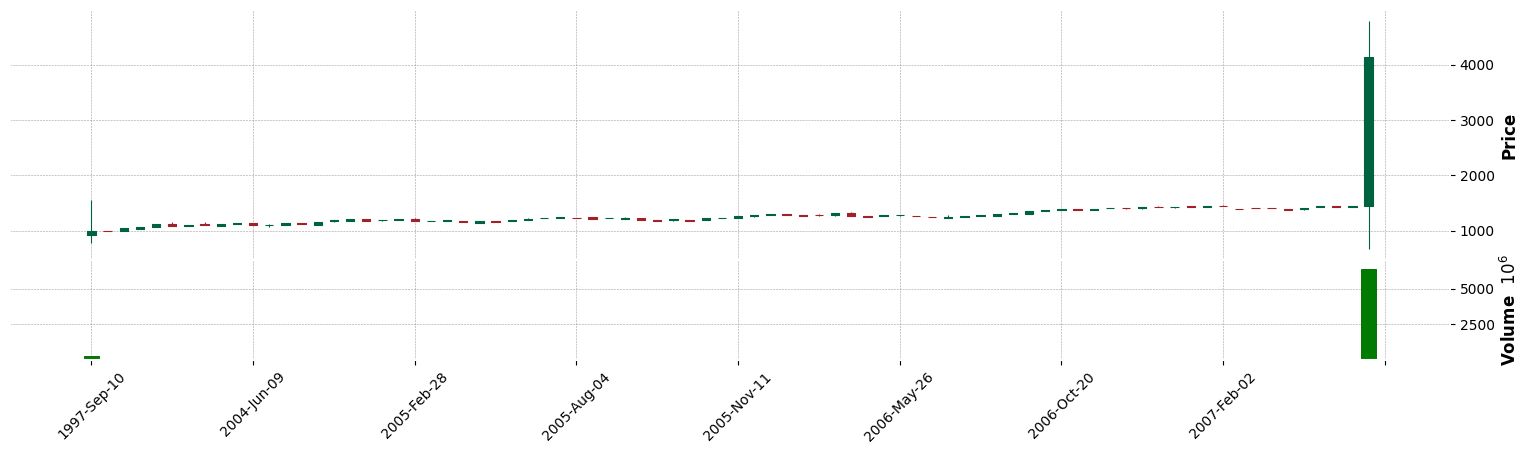

In [10]:
mplf.plot(
    dv_imbalance_bars, type="candle", style="charles", figsize=(20, 5), volume=True
)